In [1]:
import os
from pathlib import Path
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set();
from tqdm.notebook import tqdm

from memeder.database.connect import connect_to_db

In [2]:
cursor, connection = connect_to_db(env_file='db_credentials.env')

In [3]:
q = "SELECT * FROM users"
cursor.execute(q)

user_records = cursor.fetchall()
connection.commit()

df_users = pd.DataFrame(user_records, columns=['chat_id', 'name', 'telegram_id',
                                               'telegram_username', 'date_add', 'is_fresh'])

In [4]:
df_users.head()

,chat_id,name,telegram_id,telegram_username,date_add,is_fresh
0,259156066,Аринка-карантинка,259156066,chameleon_lizard,2021-12-10 22:22:39,True
1,577915728,Спиридон,577915728,Blackaddder,2021-12-11 05:57:23,True
2,439924549,oleg,439924549,ol3gka,2021-12-11 06:21:47,True
3,411123163,MX,411123163,mx_bz,2022-01-19 07:31:46,False
4,401426372,Аня,401426372,anvanche,2021-12-11 07:50:22,True


In [5]:
q = "SELECT * FROM memes"
cursor.execute(q)

memes_records = cursor.fetchall()
connection.commit()

df_memes = pd.DataFrame(memes_records, columns=['id', 'file_id', 'author_id', 'create_date',
                                                'file_type', 'file_unique_id', 'caption'])

In [6]:
df_memes.head()

,id,file_id,author_id,create_date,file_type,file_unique_id,caption
0,2811,AgACAgQAAxkBAAJJWGHqZIz4f3WSyvH0XIFxhvPjwqWxAA...,2106431824,2022-01-21 07:45:16,photo,None,None
1,2826,AgACAgIAAxkBAAKIG2H3n_djkRg9MMUShOzCMHRcIm6mAA...,354637850,2022-01-31 08:38:15,photo,AQADfL0xG4l3uUt9,None
2,2827,AgACAgQAAxkBAAL2pGIEAAH2wjbF8DWHGiNewBn_UnrE6A...,354637850,2022-02-09 17:59:18,photo,AQADyqoxGw8rrVF-,None
3,2876,AgACAgQAAxkBAAL-aWIEBLnt94wyXCXhygRdYajavWbvAA...,2106431824,2022-02-09 18:15:21,photo,AQADBqsxG3SVDFB-,"kvin, where is your corona"
4,2925,AgACAgQAAxkBAAEBAiBiBAetqQPwhJcXSKpCGXgI4lgbIw...,2106431824,2022-02-09 18:27:57,photo,AQADUa0xGzmh5VJ9,Why do you keep coming back?


In [7]:
q = "SELECT * FROM users_users"
cursor.execute(q)

users_users_records = cursor.fetchall()
connection.commit()

df_users_users = pd.DataFrame(users_users_records,
                              columns=['id', 'user_id', 'rec_user_id', 'reaction', 'date',
                                       'date_reaction', 'message_id'])

In [8]:
df_users_users.head()

,id,user_id,rec_user_id,reaction,date,date_reaction,message_id
0,1096,481807223,632944183,10001,2022-02-05 12:11:43,2022-02-05 12:11:46,39104
1,1097,481807223,170614270,10001,2022-02-05 12:11:46,2022-02-05 12:11:48,39105
2,1098,481807223,272319547,10001,2022-02-05 12:11:48,2022-02-05 12:11:50,39106
3,1099,481807223,452790304,10001,2022-02-05 12:11:51,2022-02-05 12:11:52,39107
4,1100,481807223,237266284,memes,2022-02-05 12:11:52,2022-02-05 12:14:34,39108


In [9]:
q = "SELECT * FROM users_memes"
cursor.execute(q)

users_memes_records = cursor.fetchall()
connection.commit()

df_users_memes = pd.DataFrame(users_memes_records,
                              columns=['id', 'chat_id', 'memes_id', 'reaction', 'date',
                                       'message_id', 'date_reaction', ])

In [10]:
df_users_memes.head()

,id,chat_id,memes_id,reaction,date,message_id,date_reaction
0,1008,354637850,570,1002,2022-01-18 21:53:30,7669,NaT
1,1018,354637850,597,1002,2022-01-18 23:36:17,7689,NaT
2,1028,354637850,130,1002,2022-01-18 23:56:20,7715,NaT
3,1038,354637850,2619,1002,2022-01-19 00:46:39,7745,NaT
4,1048,354637850,576,1002,2022-01-19 01:10:00,7769,NaT


In [11]:
def plot_like_dislike_ratio():
    _df = df_users_memes[(df_users_memes['reaction'] == '1000') |
                         (df_users_memes['reaction'] == '1001') |
                         (df_users_memes['reaction'] == '104')].sort_values('date')
    
    reactions = np.arange(1, len(_df) + 1)
    
    likes = np.cumsum(_df['reaction'] == '1000') / reactions
    neutrals = np.cumsum(_df['reaction'] == '104') / reactions
    dislikes = np.cumsum(_df['reaction'] == '1001') / reactions
    
    plt.figure(figsize=(15, 6), dpi=150)
    
    plt.plot(reactions, dislikes, 'k-')
    plt.plot(reactions, dislikes + neutrals, 'k-')
    
    plt.fill_between(reactions, 0, dislikes, color='r', alpha=0.85)
    plt.fill_between(reactions, dislikes, dislikes + neutrals, color='gray', alpha=0.85)
    plt.fill_between(reactions, dislikes + neutrals, 1, color='g', alpha=0.85)
    
    plt.xlim((reactions[0], reactions[-1]))
    plt.ylim((0, 1))
    
    plt.show()

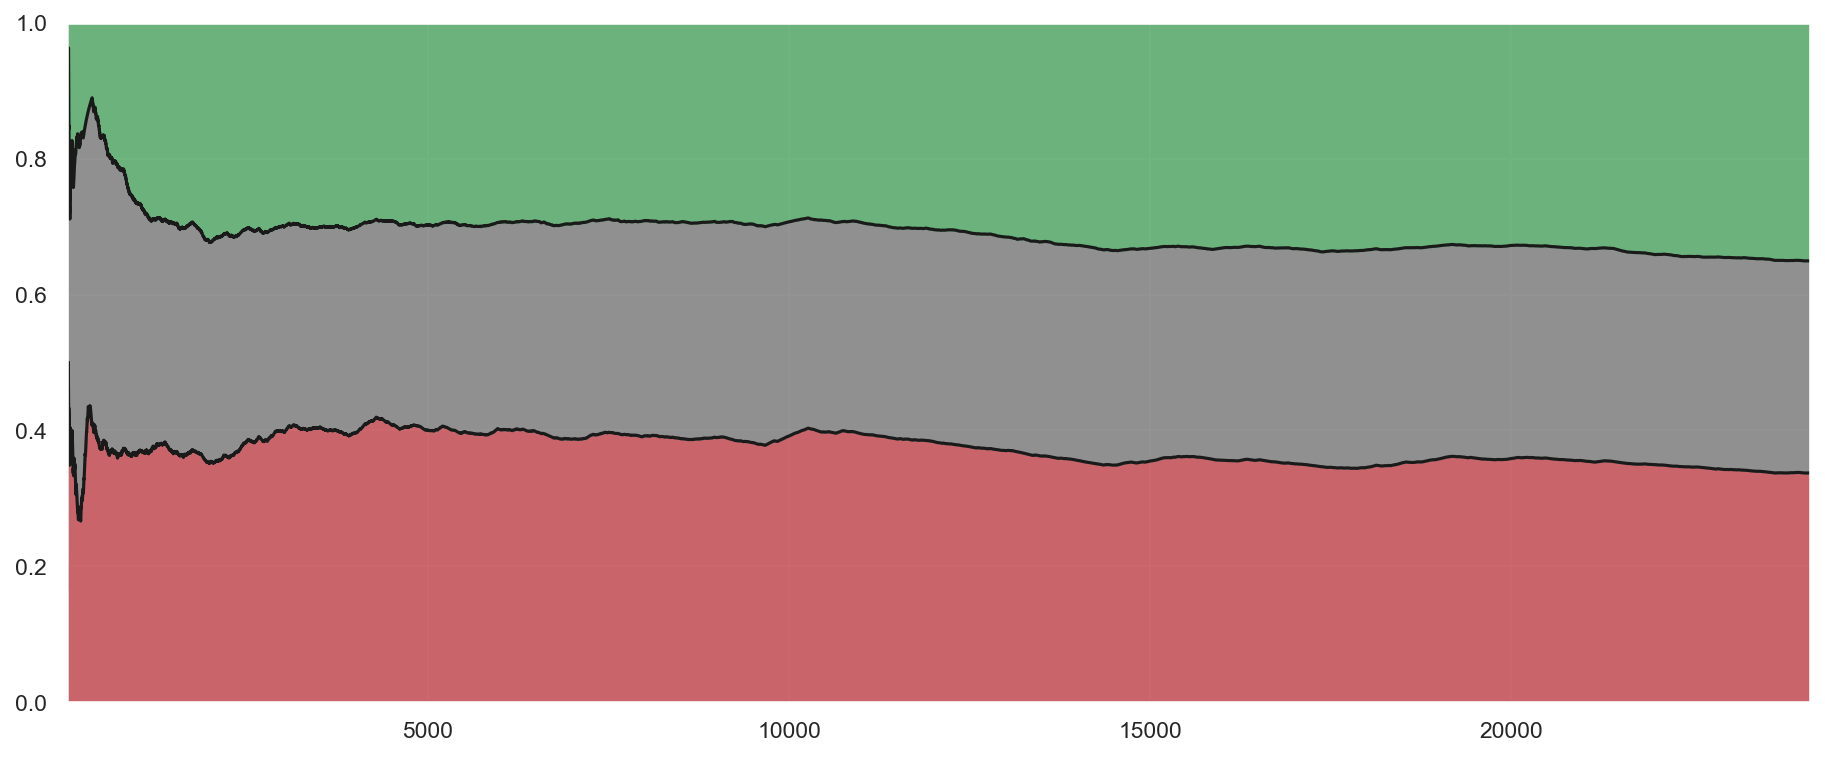

In [12]:
plot_like_dislike_ratio()

In [13]:
def plot_reactions_per_day():
    _df = df_users_memes[(df_users_memes['reaction'] == '1000') |
                         (df_users_memes['reaction'] == '1001') |
                         (df_users_memes['reaction'] == '104')].sort_values('date')
    
    dates = _df['date'].apply(lambda x: x.date()).values
    bins = (dates.max() - dates.min()).days

    plt.figure(figsize=(20, 6), dpi=100)
    plt.hist(dates, bins=bins)
    plt.ylabel('Number of reactions', fontsize=16)
    plt.show()

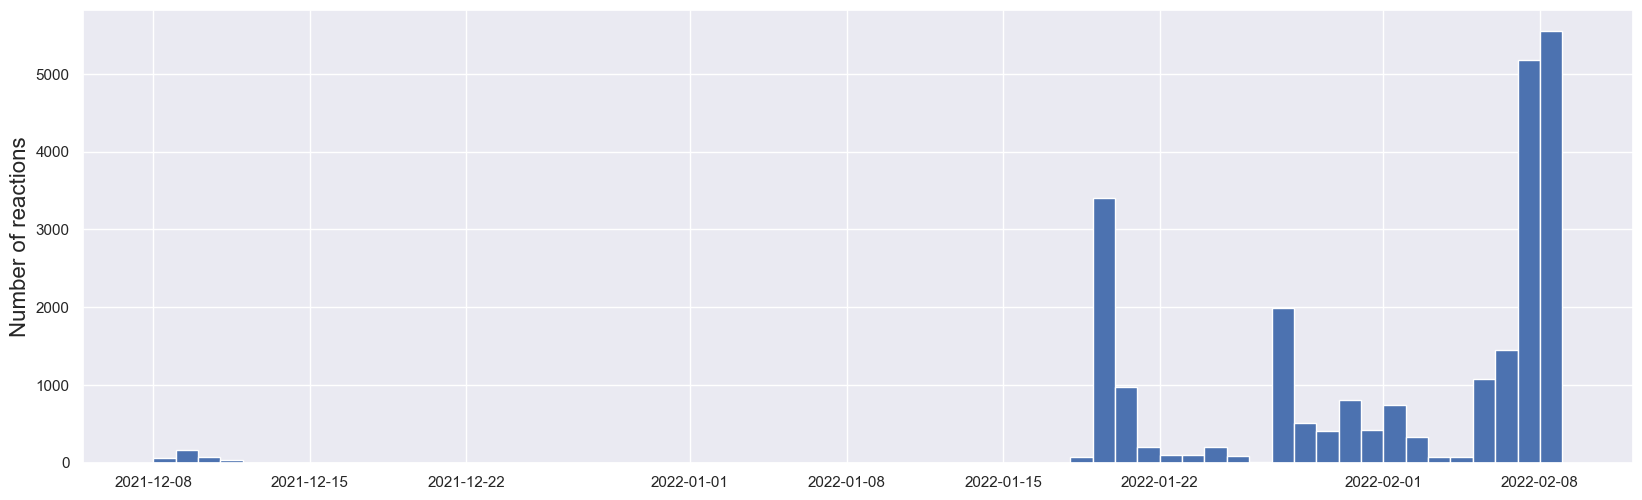

In [14]:
plot_reactions_per_day()

## Users

In [15]:
print('The number of users:', len(df_users))

The number of users: 667


In [16]:
q = 'SELECT * FROM profiles;'
cursor.execute(q)

profile_records = cursor.fetchall()
connection.commit()

df_profiles = pd.DataFrame(profile_records, columns=['chat_id', 'preferences', 'goals', 'bio', 'use_bio',
                                                     'bio_update_flag', 'photo_id', 'photo_unique_id',
                                                     'use_photo', 'photo_update_flag', 'sex'])

sex2viz = {5000: 'Boy', 5001: 'Girl', 5002: '<non-selected>'}
pref2viz = {3000: 'Show me boys', 3001: 'Show me girls', 3002: 'Show me all', 3003: 'Show me MEMES'}
goal2viz = {4000: 'Friends', 4001: 'Relationships', 4002: 'idk', 4003: 'Only MEMES'}

df_profiles['sex_viz'] = df_profiles['sex'].apply(lambda x: sex2viz[x])
df_profiles['preferences_viz'] = df_profiles['preferences'].apply(lambda x: pref2viz[x])
df_profiles['goals_viz'] = df_profiles['goals'].apply(lambda x: goal2viz[x])

In [17]:
df_profiles['sex_viz'].value_counts()

Boy               265
<non-selected>    259
Girl              143
Name: sex_viz, dtype: int64

In [18]:
df_profiles['preferences_viz'].value_counts()

Show me MEMES    333
Show me girls    194
Show me boys      85
Show me all       55
Name: preferences_viz, dtype: int64

In [19]:
df_profiles['goals_viz'].value_counts()

Only MEMES       351
Relationships    141
idk              116
Friends           59
Name: goals_viz, dtype: int64

In [20]:
df_profiles['use_photo'].value_counts()

False    597
True      70
Name: use_photo, dtype: int64

In [21]:
df_profiles['use_bio'].value_counts()

False    611
True      56
Name: use_bio, dtype: int64

In [28]:
def plot_top_users(top_n=50):
    _df = df_users_memes[(df_users_memes['reaction'] == '1000') |
                         (df_users_memes['reaction'] == '1001') |
                         (df_users_memes['reaction'] == '104')].sort_values('date')
    
    _df_top = _df['chat_id'].value_counts()[:top_n]
    _users = _df_top.index
    _counts = _df_top.values
    
    _names = [df_users[df_users['chat_id'] == _id]['name'].iloc[0] for _id in _users]
    _usernames = [df_users[df_users['chat_id'] == _id]['telegram_username'].iloc[0] for _id in _users]
    _show_names = [f'{n} (@{un})' for n, un in zip(_names, _usernames)]
    
    fig, ax = plt.subplots(figsize=(18, 6), dpi=200)
    
    x_idxs = np.arange(top_n)
    bar_width = 0.85

    b = ax.bar(x_idxs, _counts, bar_width)

    ax.set_ylabel('# reactions', fontsize=16)
    ax.set_title('Top active users', fontsize=18)
    ax.set_xticks(x_idxs, labels=_show_names, rotation=90)
    
    ax.bar_label(b, fontsize=7)

    plt.show()

/home/boris/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


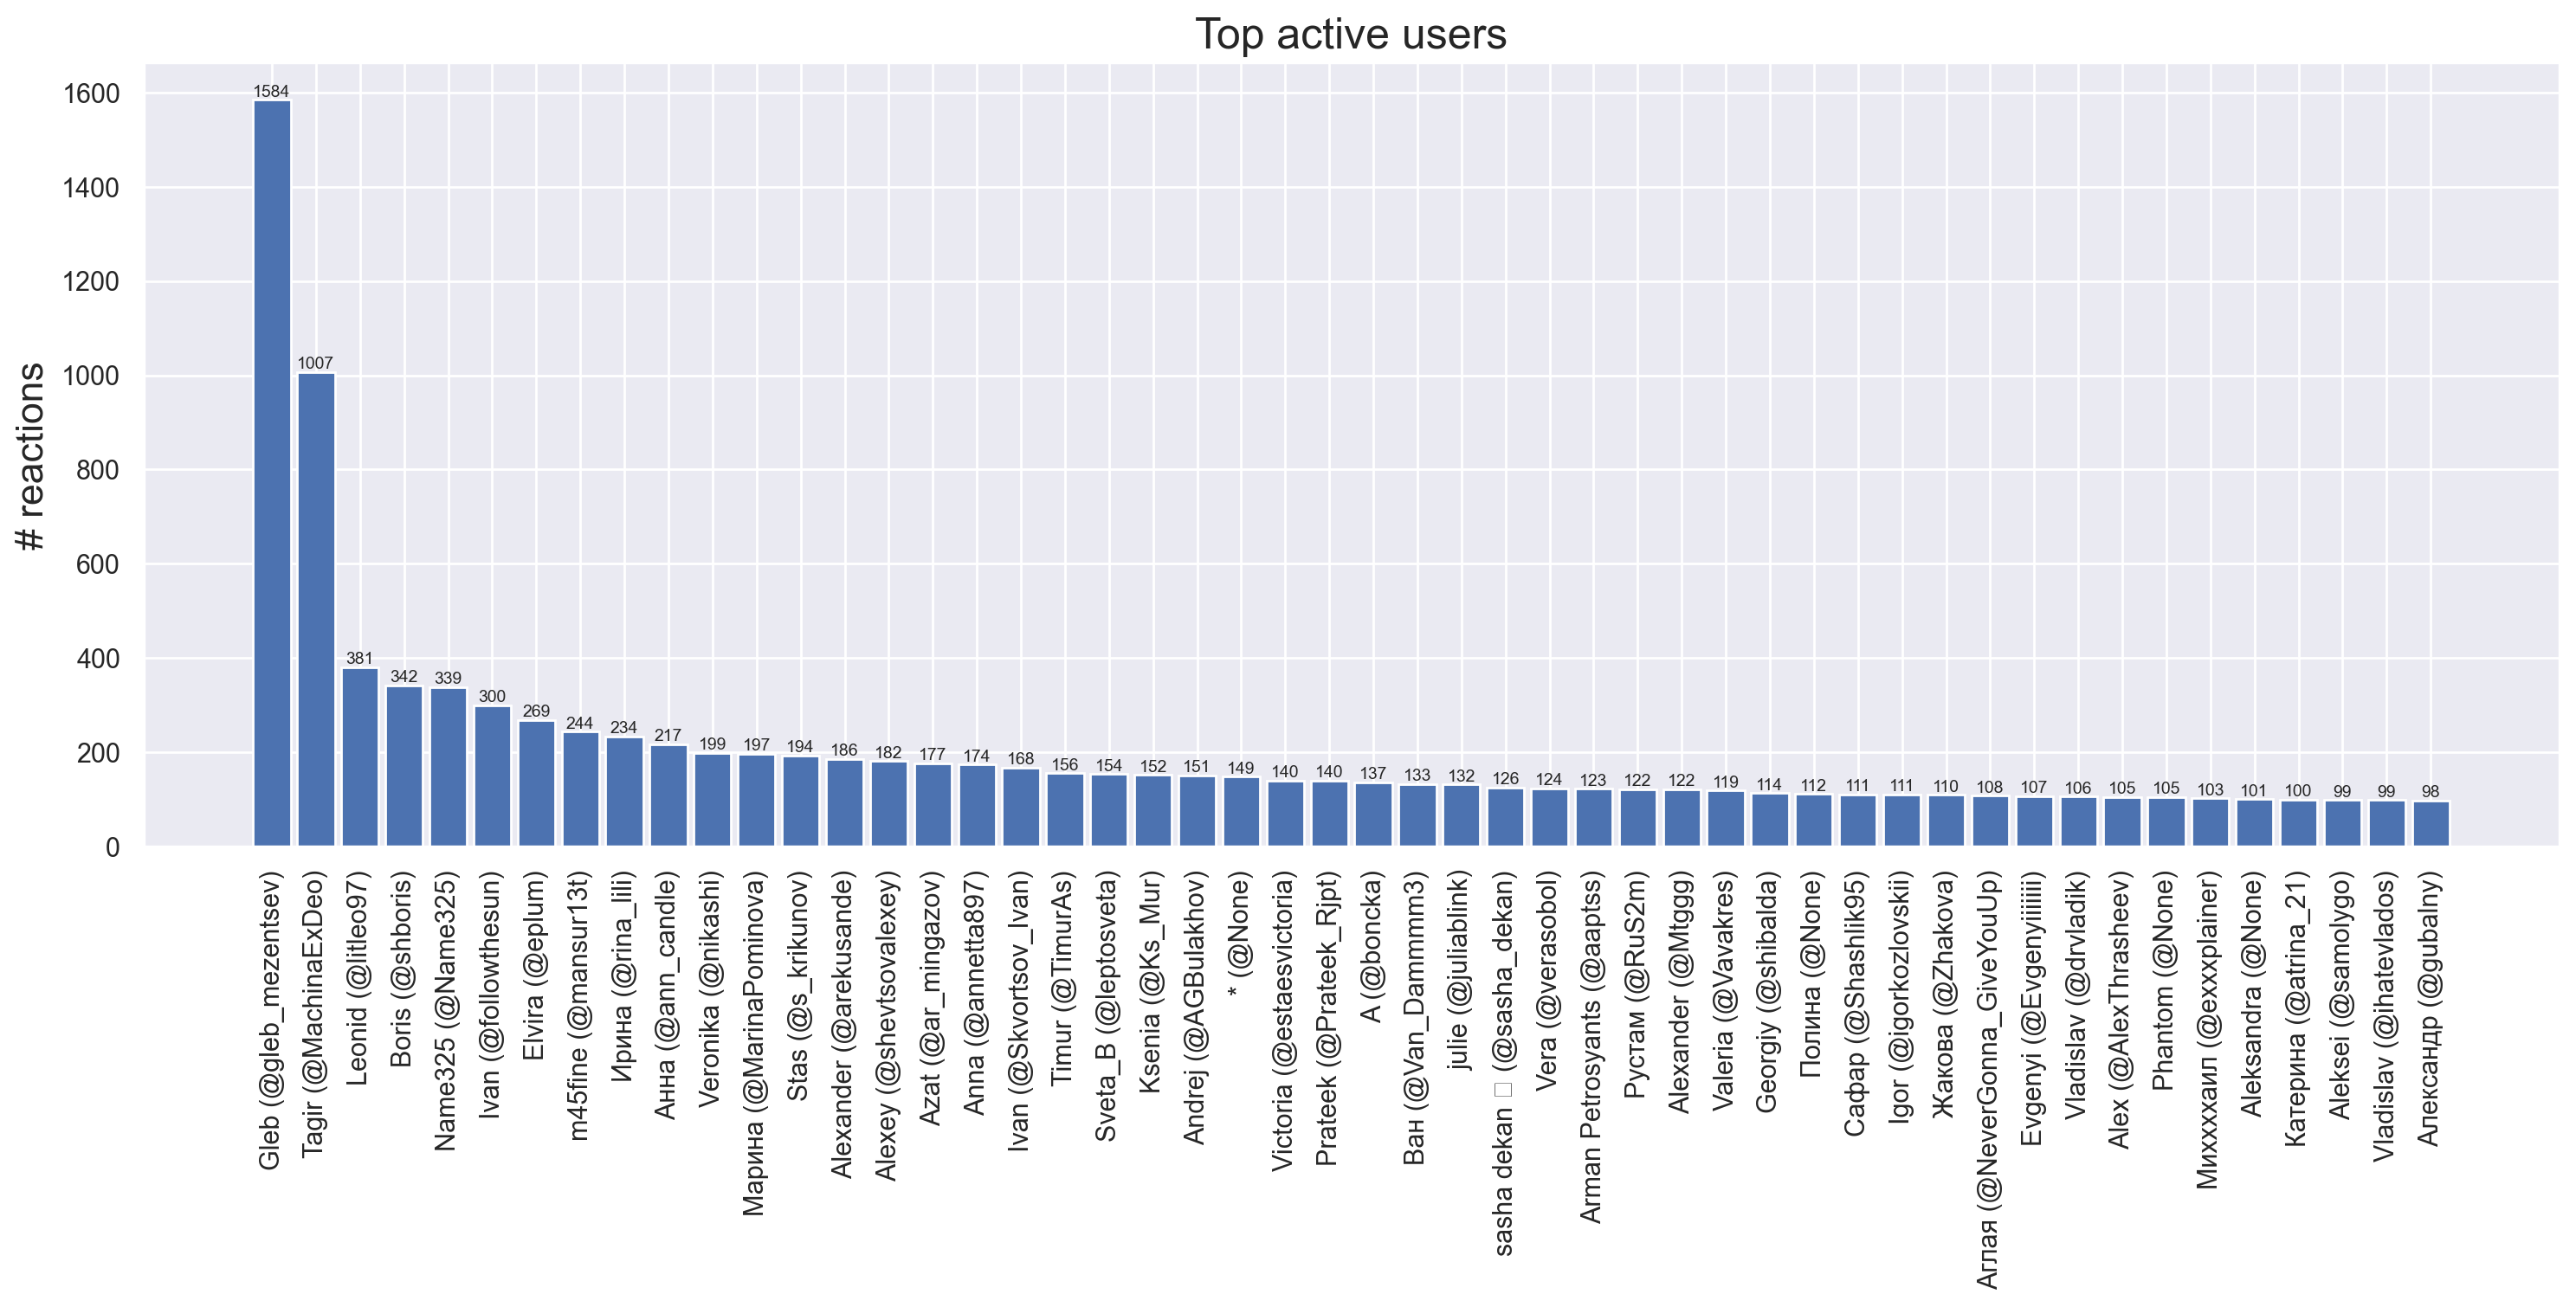

In [29]:
plot_top_users()